<a href="https://colab.research.google.com/github/Nihelesh/Visualization-Python/blob/main/Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3751885674.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


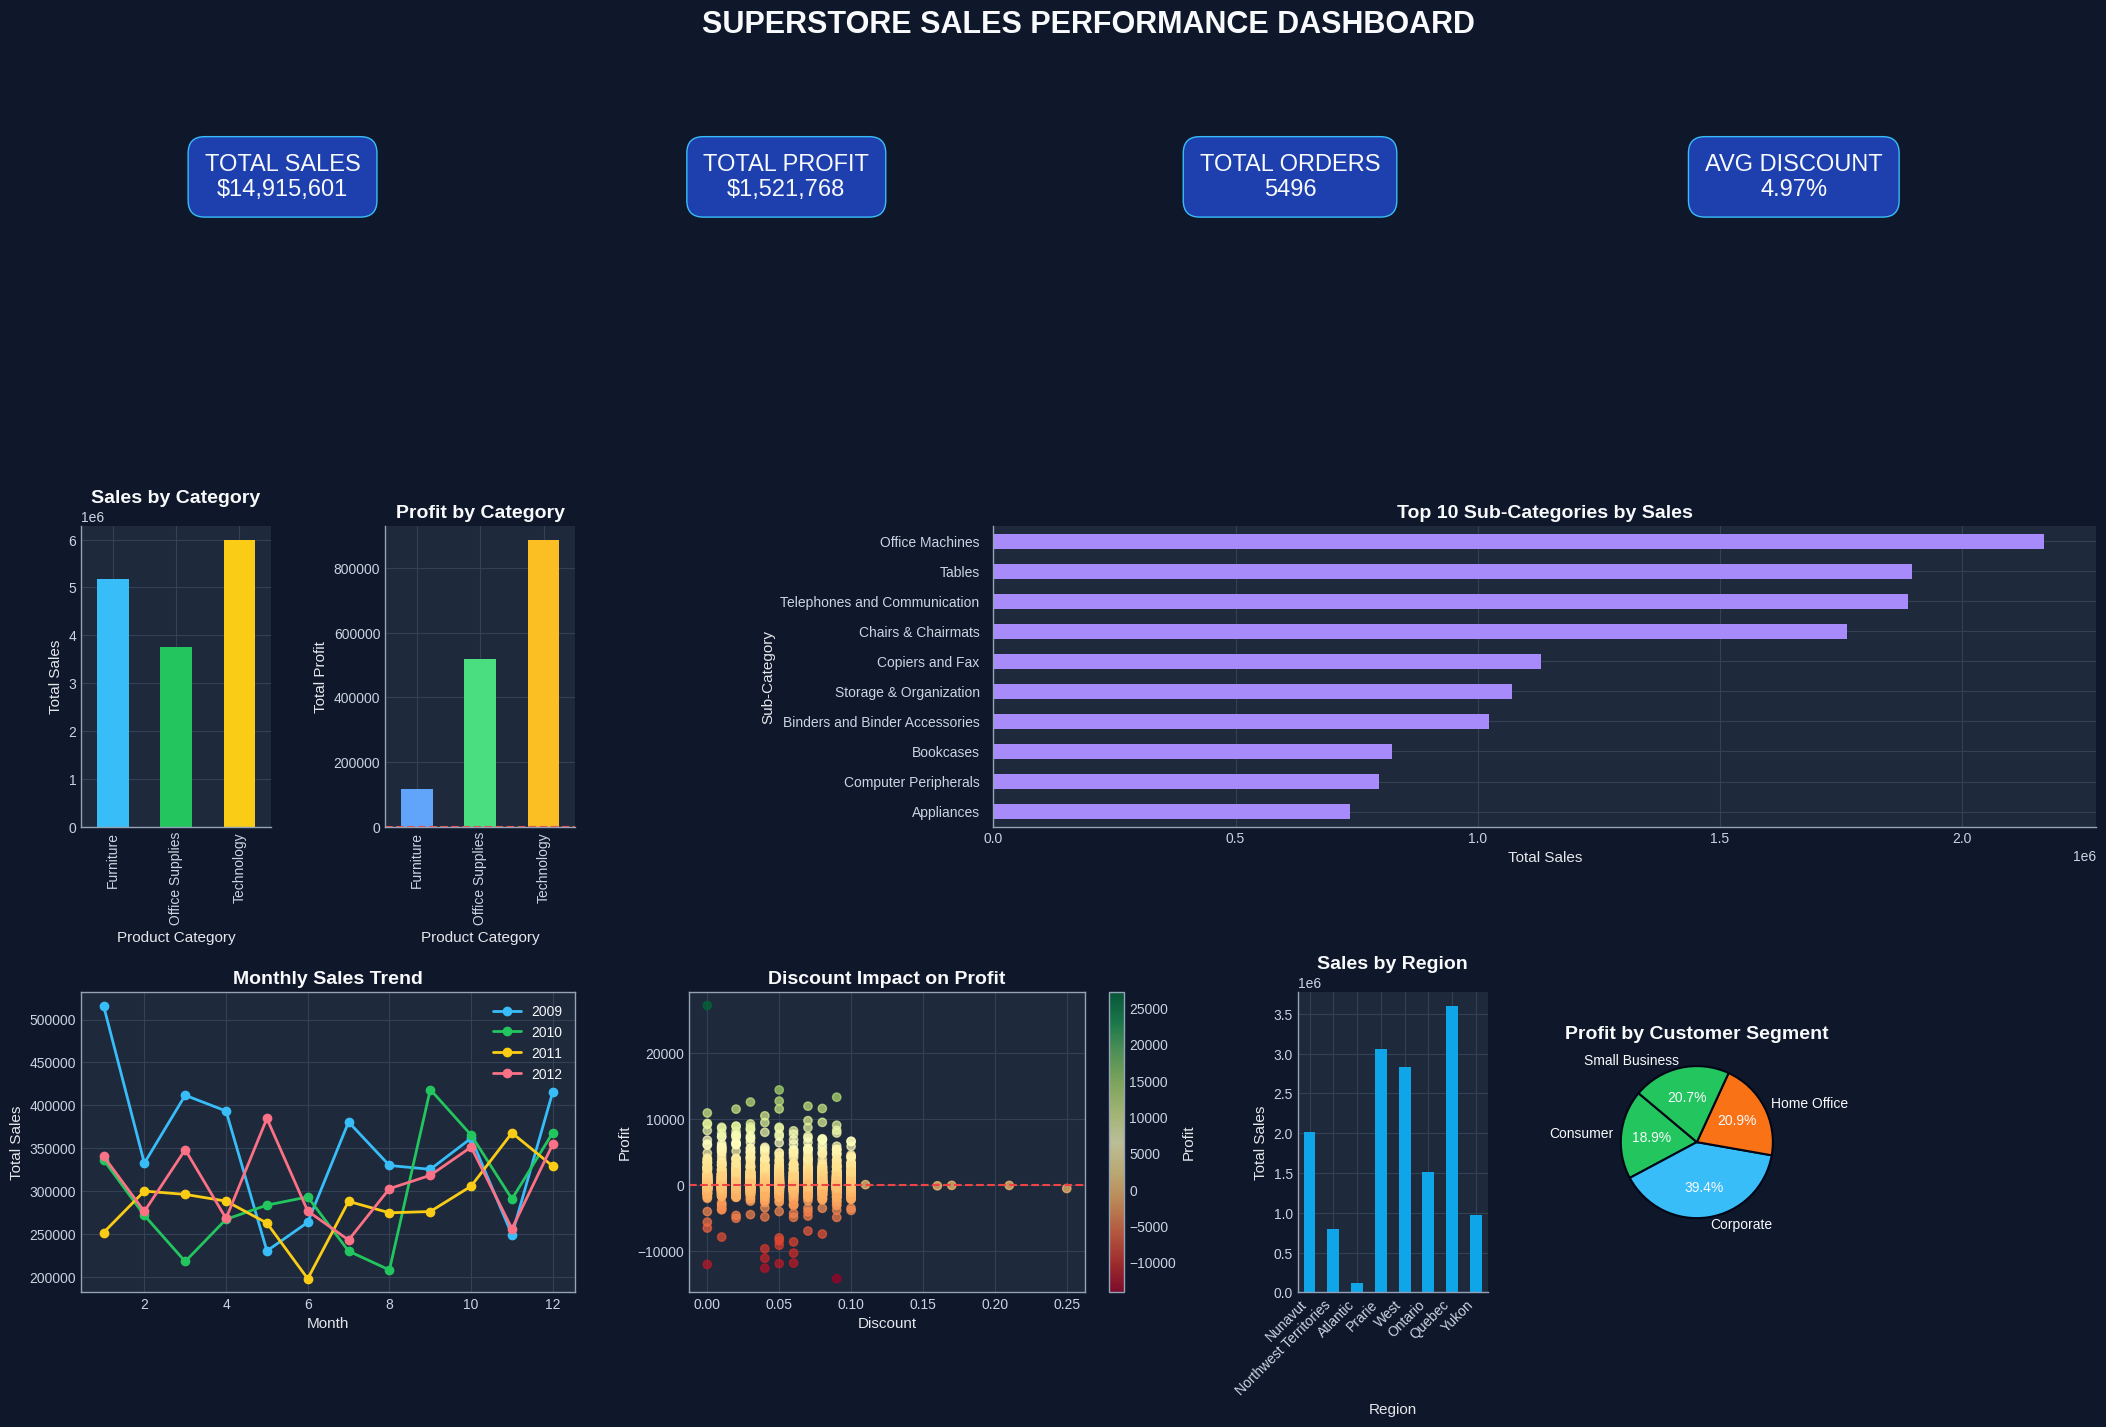

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# ---------------- GLOBAL DARK THEME ----------------
plt.style.use("dark_background")

mpl.rcParams.update({
    "figure.facecolor": "#0F172A",   # dark slate
    "axes.facecolor": "#1E293B",     # panel background
    "axes.edgecolor": "#94A3B8",
    "axes.labelcolor": "#E5E7EB",
    "xtick.color": "#CBD5E1",
    "ytick.color": "#CBD5E1",
    "text.color": "#F8FAFC",
    "grid.color": "#334155",
    "axes.titleweight": "bold",
    "axes.titlesize": 14,
    "axes.labelsize": 11,
})

# ---------------- LOAD DATA ----------------
file_path = "/content/Sample - Superstore Sales (Excel) (2).xls"
df = pd.read_excel(file_path, sheet_name="Orders")

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

df['order_date'] = pd.to_datetime(df['order_date'])
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

# ---------------- KPIs ----------------
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
total_orders = df['order_id'].nunique()
avg_discount = df['discount'].mean()

# ---------------- DASHBOARD LAYOUT ----------------
fig = plt.figure(figsize=(26, 16))
gs = fig.add_gridspec(3, 7, hspace=0.55, wspace=0.6)

# ---------------- KPI CARDS ----------------
ax_kpi = fig.add_subplot(gs[0, :])
ax_kpi.axis("off")

kpi_style = dict(
    boxstyle="round,pad=0.7",
    facecolor="#1E40AF",  # deep blue
    edgecolor="#38BDF8"
)

ax_kpi.text(0.1, 0.55, f"TOTAL SALES\n${total_sales:,.0f}", fontsize=17, ha="center", bbox=kpi_style)
ax_kpi.text(0.35, 0.55, f"TOTAL PROFIT\n${total_profit:,.0f}", fontsize=17, ha="center", bbox=kpi_style)
ax_kpi.text(0.6, 0.55, f"TOTAL ORDERS\n{total_orders}", fontsize=17, ha="center", bbox=kpi_style)
ax_kpi.text(0.85, 0.55, f"AVG DISCOUNT\n{avg_discount:.2%}", fontsize=17, ha="center", bbox=kpi_style)

ax_kpi.set_title("SUPERSTORE SALES PERFORMANCE DASHBOARD", fontsize=22, pad=20)

# ---------------- SALES BY CATEGORY ----------------
ax1 = fig.add_subplot(gs[1, 0])
df.groupby('product_category')['sales'].sum().plot(
    kind='bar', ax=ax1,
    color=["#38BDF8", "#22C55E", "#FACC15"]
)
ax1.set_title("Sales by Category")
ax1.set_xlabel("Product Category")
ax1.set_ylabel("Total Sales")
ax1.spines[['top', 'right']].set_visible(False)

# ---------------- PROFIT BY CATEGORY ----------------
ax2 = fig.add_subplot(gs[1, 1])
df.groupby('product_category')['profit'].sum().plot(
    kind='bar', ax=ax2,
    color=["#60A5FA", "#4ADE80", "#FBBF24"]
)
ax2.axhline(0, color="#EF4444", linestyle="--")
ax2.set_title("Profit by Category")
ax2.set_xlabel("Product Category")
ax2.set_ylabel("Total Profit")

ax2.spines[['top', 'right']].set_visible(False)

# ---------------- TOP 10 SUB-CATEGORIES ----------------
ax3 = fig.add_subplot(gs[1, 3:7])
df.groupby('product_sub-category')['sales'].sum() \
  .sort_values(ascending=False).head(10) \
  .plot(kind='barh', ax=ax3, color="#A78BFA")

ax3.set_title("Top 10 Sub-Categories by Sales")
ax3.set_xlabel("Total Sales")
ax3.set_ylabel("Sub-Category")
ax3.invert_yaxis()
ax3.tick_params(axis='y', pad=10)
ax3.spines[['top', 'right']].set_visible(False)

# ---------------- MONTHLY SALES TREND ----------------
ax4 = fig.add_subplot(gs[2, :2])
monthly_sales = df.groupby(['year', 'month'])['sales'].sum().reset_index()

trend_colors = ["#38BDF8", "#22C55E", "#FACC15", "#FB7185"]

for i, y in enumerate(monthly_sales['year'].unique()):
    temp = monthly_sales[monthly_sales['year'] == y]
    ax4.plot(temp['month'], temp['sales'],
             marker='o', linewidth=2,
             color=trend_colors[i % len(trend_colors)],
             label=str(y))

ax4.set_title("Monthly Sales Trend")
ax4.set_xlabel("Month")
ax4.set_ylabel("Total Sales")
ax4.legend(frameon=False)

# ---------------- DISCOUNT VS PROFIT ----------------
ax5 = fig.add_subplot(gs[2, 2:4])
scatter = ax5.scatter(
    df['discount'], df['profit'],
    c=df['profit'], cmap="RdYlGn",
    alpha=0.7
)
ax5.axhline(0, color="#EF4444", linestyle="--")
ax5.set_title("Discount Impact on Profit")
ax5.set_xlabel("Discount")
ax5.set_ylabel("Profit")
fig.colorbar(scatter, ax=ax5, label="Profit")

# ---------------- SALES BY REGION ----------------
ax6 = fig.add_subplot(gs[2, 4])
df.groupby('region')['sales'].sum().plot(
    kind='bar', ax=ax6, color="#0EA5E9"
)
ax6.set_title("Sales by Region")
ax6.set_xlabel("Region")
ax6.set_ylabel("Total Sales")
ax6.set_xticklabels(df['region'].unique(), rotation=45, ha="right")
ax6.spines[['top', 'right']].set_visible(False)

# ---------------- CUSTOMER SEGMENT PIE ----------------
ax7 = fig.add_subplot(gs[2, 5])
profit_by_segment = df.groupby('customer_segment')['profit'].sum()

ax7.pie(
    profit_by_segment,
    labels=profit_by_segment.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=["#22C55E", "#38BDF8", "#F97316"],
    wedgeprops={'edgecolor': '#020617', 'linewidth': 1.5}
)
ax7.set_title("Profit by Customer Segment")

plt.tight_layout()
plt.show()


/tmp/ipython-input-2809041500.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


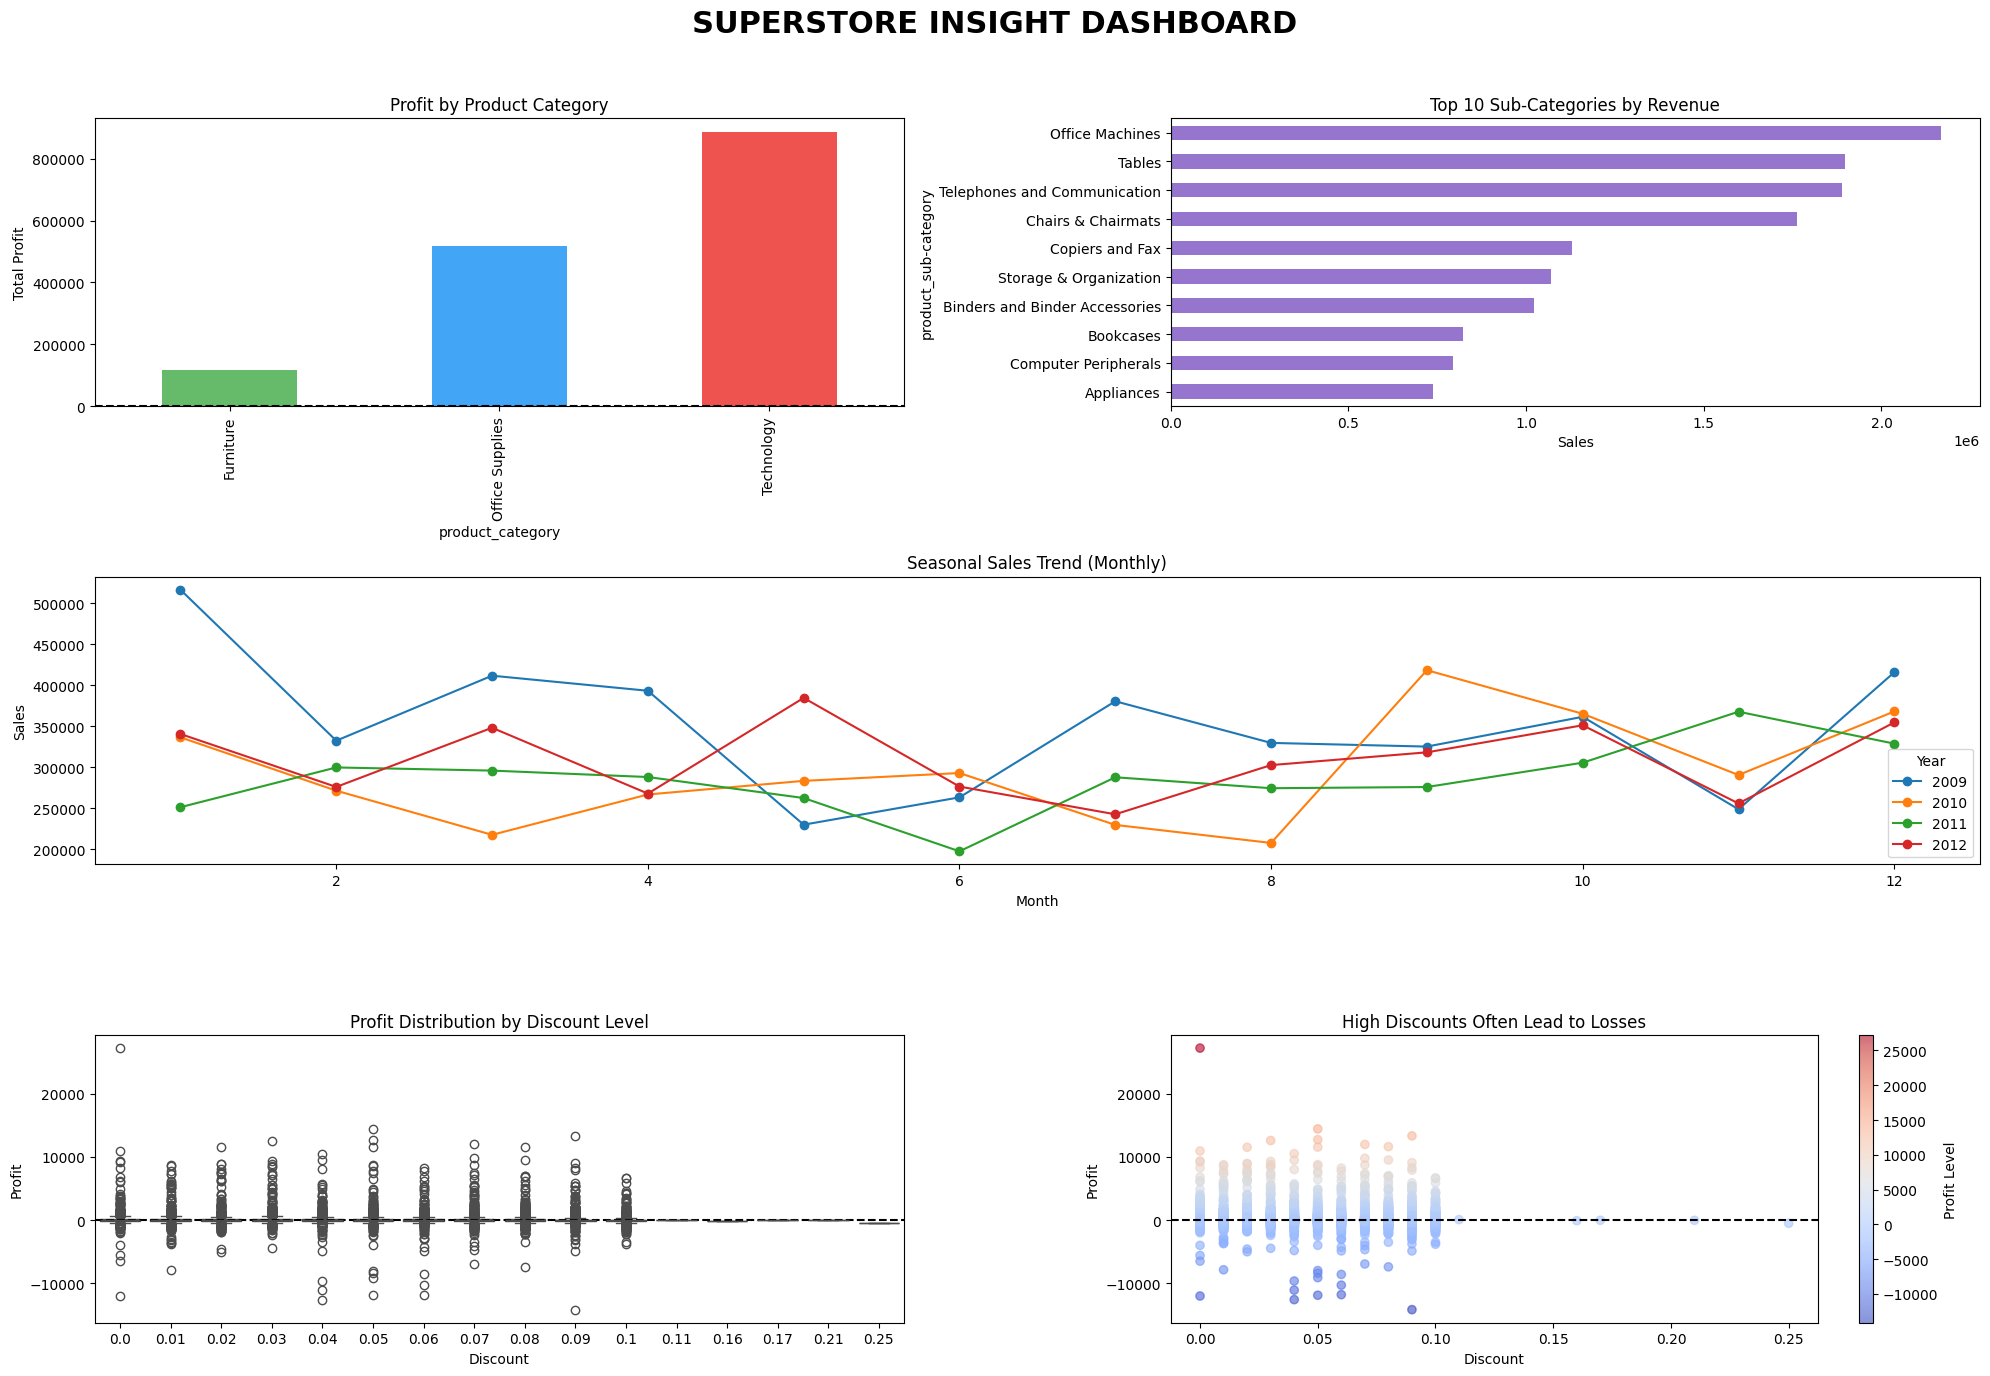

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/Sample - Superstore Sales (Excel) (2).xls"
df = pd.read_excel(file_path, sheet_name="Orders")

# Clean columns
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Date features
df['order_date'] = pd.to_datetime(df['order_date'])
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

# Figure setup
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 4)

fig.suptitle(
    "SUPERSTORE INSIGHT DASHBOARD",
    fontsize=22,
    fontweight='bold'
)

# ---------------------------------------------------
# 1. Categories drive different profits
# ---------------------------------------------------
ax1 = fig.add_subplot(gs[0, :2])
profit_by_category = df.groupby('product_category')['profit'].sum()

profit_by_category.plot(
    kind='bar',
    ax=ax1,
    color=['#66BB6A', '#42A5F5', '#EF5350']
)

ax1.set_title("Profit by Product Category")
ax1.set_ylabel("Total Profit")
ax1.axhline(0, color='black', linestyle='--')

# ---------------------------------------------------
# 2. Some sub-categories dominate revenue
# ---------------------------------------------------
ax2 = fig.add_subplot(gs[0, 2:])
top_subcats = (
    df.groupby('product_sub-category')['sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_subcats.plot(
    kind='barh',
    ax=ax2,
    color='#9575CD'
)

ax2.set_title("Top 10 Sub-Categories by Revenue")
ax2.invert_yaxis()
ax2.set_xlabel("Sales")

# ---------------------------------------------------
# 3. Sales are seasonal
# ---------------------------------------------------
ax3 = fig.add_subplot(gs[1, :])
monthly_sales = (
    df.groupby(['year', 'month'])['sales']
    .sum()
    .reset_index()
)

for y in monthly_sales['year'].unique():
    temp = monthly_sales[monthly_sales['year'] == y]
    ax3.plot(temp['month'], temp['sales'], marker='o', label=str(y))

ax3.set_title("Seasonal Sales Trend (Monthly)")
ax3.set_xlabel("Month")
ax3.set_ylabel("Sales")
ax3.legend(title="Year")

# ---------------------------------------------------
# 4. High discounts often lead to losses
# ---------------------------------------------------
ax4 = fig.add_subplot(gs[2, :2])

sns.boxplot(
    x='discount',
    y='profit',
    data=df,
    ax=ax4,
    palette='coolwarm'
)

ax4.axhline(0, linestyle='--', color='black')
ax4.set_title("Profit Distribution by Discount Level")
ax4.set_xlabel("Discount")
ax4.set_ylabel("Profit")

# ---------------------------------------------------
# 5. Discount vs Profit Scatter (Loss Zones)
# ---------------------------------------------------
ax5 = fig.add_subplot(gs[2, 2:])

scatter = ax5.scatter(
    df['discount'],
    df['profit'],
    c=df['profit'],
    cmap='coolwarm',
    alpha=0.6
)

ax5.axhline(0, linestyle='--', color='black')
ax5.set_title("High Discounts Often Lead to Losses")
ax5.set_xlabel("Discount")
ax5.set_ylabel("Profit")

fig.colorbar(scatter, ax=ax5, label="Profit Level")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
